In [1]:
pwd

'C:\\Users\\clubc\\Desktop\\python_basic'

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
import pandas as pd
import numpy
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# seed 값 설정 (환경을 같게 만들어주어, 딥러닝 실행 시 같은 값이 나올 수 있게 해줌)
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
# 데이터 입력
df_pre = pd.read_csv('./data_wine/wine.csv', header=None)
df_pre

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,1
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,1
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,1
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1


In [7]:
# 데이터 샘플링
df = df_pre.sample(frac=1)  # 랜덤 샘플을 가져오는데, 원본 데이터의 100%를 가져오라는 뜻(frac=0.5로 지정하면 50%만 랜덤으로 가져옴)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.180,0.24,3.40,0.053,20.0,119.0,0.99373,3.11,0.52,9.20,6,0
5210,6.8,0.140,0.18,1.40,0.047,30.0,90.0,0.99164,3.27,0.54,11.20,6,0
3518,7.3,0.220,0.50,13.70,0.049,56.0,189.0,0.99940,3.24,0.66,9.00,6,0
1622,7.6,0.670,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.30,5,0
2443,7.3,0.210,0.29,1.60,0.034,29.0,118.0,0.99170,3.30,0.50,11.00,8,0
3521,7.0,0.120,0.19,4.90,0.055,27.0,127.0,0.99530,3.29,0.41,9.40,5,0
5211,6.8,0.160,0.18,1.80,0.046,31.0,114.0,0.99226,3.27,0.55,10.80,6,0
4936,6.9,0.380,0.29,13.65,0.048,52.0,189.0,0.99784,3.00,0.60,9.50,6,0
1161,8.8,0.450,0.43,1.40,0.076,12.0,21.0,0.99551,3.21,0.75,10.20,6,1
5993,6.3,0.200,0.26,12.70,0.046,60.0,143.0,0.99526,3.26,0.35,10.80,6,0


In [8]:
dataset = df.values
dataset

array([[ 6.3 ,  0.18,  0.24, ...,  9.2 ,  6.  ,  0.  ],
       [ 6.8 ,  0.14,  0.18, ..., 11.2 ,  6.  ,  0.  ],
       [ 7.3 ,  0.22,  0.5 , ...,  9.  ,  6.  ,  0.  ],
       ...,
       [ 6.8 ,  0.2 ,  0.59, ...,  9.1 ,  6.  ,  0.  ],
       [ 6.6 ,  0.22,  0.37, ..., 10.3 ,  7.  ,  0.  ],
       [ 8.7 ,  0.22,  0.42, ..., 10.  ,  5.  ,  0.  ]])

In [9]:
X = dataset[:, 0:12]
Y = dataset[:, 12]

### 데이터 확인

In [10]:
X

array([[ 6.3 ,  0.18,  0.24, ...,  0.52,  9.2 ,  6.  ],
       [ 6.8 ,  0.14,  0.18, ...,  0.54, 11.2 ,  6.  ],
       [ 7.3 ,  0.22,  0.5 , ...,  0.66,  9.  ,  6.  ],
       ...,
       [ 6.8 ,  0.2 ,  0.59, ...,  0.38,  9.1 ,  6.  ],
       [ 6.6 ,  0.22,  0.37, ...,  0.55, 10.3 ,  7.  ],
       [ 8.7 ,  0.22,  0.42, ...,  0.43, 10.  ,  5.  ]])

In [11]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
# 모델 설정
model = Sequential()
model.add(Dense(32,  input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

## 체크포인트 만들어서 모델 저장하기

In [14]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

## 얼리스타핑 만들어서 과적합 방지

In [15]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 1. 그래프 없이 오차 및 정확도 측정[checkpointer, early_stopping_callback]

In [16]:
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=1000, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping_callback])
# 앞서 저장한 모델보다 나은 결과값(테스트 오차값이 감소)이 나올 때만 모델을 저장한다.


Epoch 00001: val_loss improved from inf to 7.59636, saving model to ./model\01-7.5964.hdf5

Epoch 00002: val_loss improved from 7.59636 to 0.44418, saving model to ./model\02-0.4442.hdf5

Epoch 00003: val_loss improved from 0.44418 to 0.24183, saving model to ./model\03-0.2418.hdf5

Epoch 00004: val_loss improved from 0.24183 to 0.20928, saving model to ./model\04-0.2093.hdf5

Epoch 00005: val_loss improved from 0.20928 to 0.20296, saving model to ./model\05-0.2030.hdf5

Epoch 00006: val_loss improved from 0.20296 to 0.19914, saving model to ./model\06-0.1991.hdf5

Epoch 00007: val_loss improved from 0.19914 to 0.19513, saving model to ./model\07-0.1951.hdf5

Epoch 00008: val_loss did not improve from 0.19513

Epoch 00009: val_loss improved from 0.19513 to 0.18796, saving model to ./model\09-0.1880.hdf5

Epoch 00010: val_loss improved from 0.18796 to 0.18640, saving model to ./model\10-0.1864.hdf5

Epoch 00011: val_loss improved from 0.18640 to 0.17984, saving model to ./model\11-0.17


Epoch 00111: val_loss did not improve from 0.05386


In [17]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

204/204 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9845

 Accuracy: 0.9845


## 2. 그래프로 테스트셋 오차, 학습셋 정확도 확인

In [34]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.2, epochs=1000, batch_size=200, verbose=1, callbacks=[checkpointer, early_stopping_callback])

Train on 5197 samples, validate on 1300 samples
Epoch 1/1000
5197/5197 [==============================] - 0s 35us/step - loss: 0.5127 - accuracy: 0.8482 - val_loss: 0.3040 - val_accuracy: 0.8600

Epoch 00001: val_loss improved from inf to 0.30396, saving model to ./model/01-0.3040.hdf5
Epoch 2/1000
5197/5197 [==============================] - 0s 6us/step - loss: 0.2780 - accuracy: 0.8913 - val_loss: 0.2642 - val_accuracy: 0.9023

Epoch 00002: val_loss improved from 0.30396 to 0.26418, saving model to ./model/02-0.2642.hdf5
Epoch 3/1000
5197/5197 [==============================] - 0s 6us/step - loss: 0.2259 - accuracy: 0.9221 - val_loss: 0.2187 - val_accuracy: 0.9285

Epoch 00003: val_loss improved from 0.26418 to 0.21872, saving model to ./model/03-0.2187.hdf5
Epoch 4/1000
5197/5197 [==============================] - 0s 6us/step - loss: 0.2034 - accuracy: 0.9319 - val_loss: 0.2086 - val_accuracy: 0.9308

Epoch 00004: val_loss improved from 0.21872 to 0.20861, saving model to ./model/04

5197/5197 [==============================] - 0s 12us/step - loss: 0.0812 - accuracy: 0.9748 - val_loss: 0.0965 - val_accuracy: 0.9785

Epoch 00036: val_loss improved from 0.09905 to 0.09650, saving model to ./model/36-0.0965.hdf5
Epoch 37/1000
5197/5197 [==============================] - 0s 8us/step - loss: 0.0804 - accuracy: 0.9742 - val_loss: 0.1041 - val_accuracy: 0.9700

Epoch 00037: val_loss did not improve from 0.09650
Epoch 38/1000
5197/5197 [==============================] - 0s 7us/step - loss: 0.0786 - accuracy: 0.9734 - val_loss: 0.1147 - val_accuracy: 0.9738

Epoch 00038: val_loss did not improve from 0.09650
Epoch 39/1000
5197/5197 [==============================] - 0s 8us/step - loss: 0.0846 - accuracy: 0.9721 - val_loss: 0.0954 - val_accuracy: 0.9723

Epoch 00039: val_loss improved from 0.09650 to 0.09539, saving model to ./model/39-0.0954.hdf5
Epoch 40/1000
5197/5197 [==============================] - 0s 8us/step - loss: 0.0772 - accuracy: 0.9744 - val_loss: 0.0930 - val


Epoch 00074: val_loss did not improve from 0.08530
Epoch 75/1000
5197/5197 [==============================] - 0s 12us/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0938 - val_accuracy: 0.9785

Epoch 00075: val_loss did not improve from 0.08530
Epoch 76/1000
5197/5197 [==============================] - 0s 10us/step - loss: 0.0572 - accuracy: 0.9806 - val_loss: 0.0854 - val_accuracy: 0.9792

Epoch 00076: val_loss did not improve from 0.08530


In [35]:
# y_vloss에 테스트셋 오차를 저장
y_vloss = history.history['val_loss']

# y_acc 에 학습셋 정확도를 저장
y_acc = history.history['accuracy']

# y_val_accuracy에 테스트셋 정확도를 저장
y_val_accuracy = history.history['val_accuracy']

In [36]:
y_val_accuracy

[0.8600000143051147,
 0.9023076891899109,
 0.9284615516662598,
 0.9307692050933838,
 0.9292307496070862,
 0.926153838634491,
 0.9292307496070862,
 0.9292307496070862,
 0.9346153736114502,
 0.936923086643219,
 0.9376922845840454,
 0.939230740070343,
 0.939230740070343,
 0.9399999976158142,
 0.942307710647583,
 0.9453846216201782,
 0.9453846216201782,
 0.947692334651947,
 0.949999988079071,
 0.9515384435653687,
 0.947692334651947,
 0.9576923251152039,
 0.9584615230560303,
 0.9592307806015015,
 0.9676923155784607,
 0.9653846025466919,
 0.9684615135192871,
 0.9700000286102295,
 0.9700000286102295,
 0.9553846120834351,
 0.9684615135192871,
 0.9707692265510559,
 0.9730769395828247,
 0.9738461375236511,
 0.9738461375236511,
 0.9784615635871887,
 0.9700000286102295,
 0.9738461375236511,
 0.9723076820373535,
 0.9746153950691223,
 0.9784615635871887,
 0.9761538505554199,
 0.9746153950691223,
 0.9761538505554199,
 0.9738461375236511,
 0.9769230484962463,
 0.9792307615280151,
 0.9761538505554199,


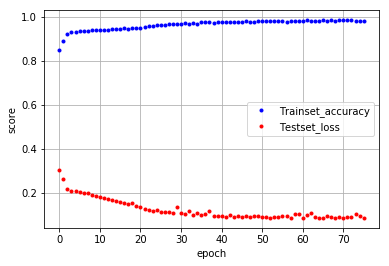


 Test Accuracy: 0.9792


In [37]:
# x값을 지정하고 테스트셋 정확도를 파란색으로, 학습셋 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='Trainset_accuracy')
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='Testset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('score')

plt.show()

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % y_val_accuracy[-1])